# 물품 계약 내역 中 배추김치 2018~2020

In [2]:
import pandas as pd
from pandas import DataFrame

data_set = pd.read_excel('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/EDA/물품+계약+내역(00033)_20220127153236_배추김치_20182020.xlsx')

In [3]:
data_set.columns

Index(['등록유형', '조달구분', '공고시스템명', '계약구분', '계약번호', '계약변경차수', '최종계약여부', '수요기관명',
       '수요기관코드', '수요기관구분', '수요기관지역명', '계약건명', '계약법구분', '조항호코드', '조항호명', '계약방법',
       '대표물품분류번호', '대표품명', '대표세부물품분류번호', '대표세부품명', '다수공급자계약여부', '우수제품여부',
       '최초계약일자', '최초계약금액', '계약일자', '계약수량', '계약금액', '증감계약수량', '증감계약금액',
       '대금지급구분', '최대납품기한', '공동계약여부', '업체명', '업체사업자등록번호', '업체기업구분명', '조달요청번호',
       '입찰공고번호', '추정가격', '예정가격', '입찰계약방법', '낙찰자결정방법', '초년도계약번호', '장기계약차수',
       '장기계속계약여부', '계약지청명', '낙찰업체투찰금액', '낙찰업체투찰률'],
      dtype='object')

In [4]:
columns = ["수요기관코드", "대표물품분류번호", "계약일자", "계약수량","계약금액"]
df = DataFrame(data=data_set, columns=columns)

In [5]:
df.계약일자.max()

20201231

In [6]:
df['계약일자']= df['계약일자'].astype('str')

In [7]:
pd.to_datetime(df['계약일자'])

0      2020-12-31
1      2020-12-31
2      2020-12-31
3      2020-12-31
4      2020-12-31
          ...    
4302   2018-01-02
4303   2018-01-02
4304   2018-01-01
4305   2018-01-01
4306   2018-02-26
Name: 계약일자, Length: 4307, dtype: datetime64[ns]

In [8]:
df

,수요기관코드,대표물품분류번호,계약일자,계약수량,계약금액
0,7480237,50467001,20201231,1.000,1548710
1,7480128,50467001,20201231,1.000,2741310
2,7480128,50467001,20201231,1.000,2673850
3,4680000,50467001,20201231,1.000,15390000
4,7240106,50467001,20201231,1.000,25917130
...,...,...,...,...,...
4302,Z001231,50467001,20180102,2344.877,70909080
4303,8280010,50467001,20180102,1.000,32108050
4304,7500231,50467001,20180101,235.000,35179000
4305,7500231,50467001,20180101,185.000,26845400


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
col = ["계약일자", "계약수량","계약금액"]

In [11]:
new_df = DataFrame(data=df,columns=col)

In [12]:


new_df

,계약일자,계약수량,계약금액
0,20201231,1.000,1548710
1,20201231,1.000,2741310
2,20201231,1.000,2673850
3,20201231,1.000,15390000
4,20201231,1.000,25917130
...,...,...,...
4302,20180102,2344.877,70909080
4303,20180102,1.000,32108050
4304,20180101,235.000,35179000
4305,20180101,185.000,26845400


In [13]:
import numpy as np

In [14]:
temp = new_df['계약금액'].values.tolist()

In [15]:


min_val=np.min(temp)
max_val=np.max(temp)

#new_df.plot(temp)


In [16]:


temp_df=new_df.loc[1:]
t=np.arange(10)

<AxesSubplot:xlabel='계약수량', ylabel='계약금액'>

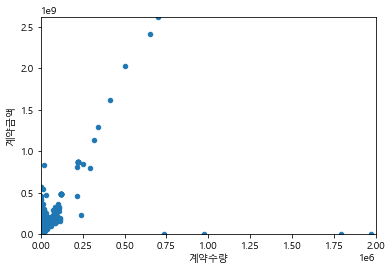

In [17]:
plt.rcParams['font.family'] = 'Malgun Gothic'
temp_df.plot.scatter(x='계약수량',y='계약금액',ylim=(min_val,max_val),xlim=(0,2000000))


# 수요기관별 입찰진행 실적 집계 2017

In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.grid'] = True


In [19]:
dataset = pd.read_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/EDA/수요기관별+입찰진행실적+집계(00067)_20220128125233.csv')

In [20]:
dataset.columns

Index(['수요기관명', '수요기관구분', '수요기관지역명', '최상위기관명', '조달구분', '업무구분', '입찰방식', '공고일자',
       '개찰일자', '공고건수', '개찰완료건수', '유찰건수', '재입찰건수', '낙찰자결정건수', '낙찰금액합계',
       '수요기관코드'],
      dtype='object')

In [21]:
dataset

,수요기관명,수요기관구분,수요기관지역명,최상위기관명,조달구분,업무구분,입찰방식,공고일자,개찰일자,공고건수,개찰완료건수,유찰건수,재입찰건수,낙찰자결정건수,낙찰금액합계,수요기관코드
0,울산광역시교육청 울산공업고등학교,교육기관,울산광역시 남구,울산광역시교육청,자체조달,물품,전자입찰,20170807,20170818,1,1.0,0.0,0.0,1.0,78840000.0,7480044
1,한국식품산업클러스터진흥원,기타공공기관,전라북도 익산시,정부산하기관및위원회,자체조달,기술용역,직찰,20170104,20170118,1,NaN,NaN,NaN,NaN,NaN,B554243
2,서울특별시동작교육청 서울노량진초등학교,교육기관,서울특별시 동작구,서울특별시교육청,자체조달,공사,전자입찰,20170112,20170118,1,1.0,0.0,0.0,1.0,40894900.0,7100054
3,대구시설공단,지방공기업,대구광역시 남구,대구광역시,자체조달,공사,전자입찰,20170403,20170407,1,1.0,0.0,0.0,1.0,14778383.0,Z004900
4,부산대학교,국가기관,부산광역시 금정구,교육부,자체조달,기술용역,전자입찰,20170619,20170629,1,0.0,1.0,0.0,1.0,NaN,7000463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298916,광양만권경제자유구역청,지자체,전라남도 광양시,전라남도,자체조달,기술용역,전자입찰,20170207,20170215,2,2.0,0.0,0.0,2.0,205483000.0,Z009240
298917,제주특별자치도교육청,교육기관,제주특별자치도 제주시,제주특별자치도교육청,자체조달,공사,전자입찰,20170713,20170719,1,1.0,0.0,0.0,1.0,27333204.0,9290000
298918,대구광역시교육청 대구공업고등학교,교육기관,대구광역시 동구,대구광역시교육청,자체조달,물품,전자입찰,20170629,20170705,1,1.0,0.0,0.0,1.0,5897980.0,7240111
298919,경기도교육청 경기도화성오산교육지원청 동학초등학교,교육기관,경기도 화성시,경기도교육청,자체조달,기술용역,전자입찰,20170711,20170718,1,1.0,0.0,0.0,1.0,11585000.0,7679022


In [22]:
#dataset[dataset['수요기관구분'].isnull()].수요기관명.unique()

condition = dataset.수요기관구분.isnull()
dataset_null=dataset[condition]
dataset_null_count = dataset_null.낙찰금액합계.sum()
dataset_null_count

331826161652.80005

[0 1 2 3 4 5 6 7 8 9]


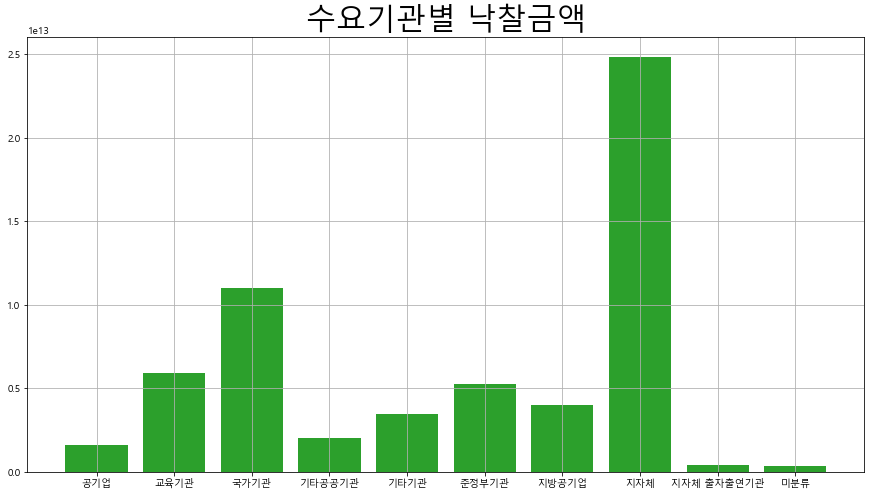

In [23]:
dataset_grouped = pd.DataFrame(dataset.groupby(dataset.수요기관구분).낙찰금액합계.sum())
dataset_grouped_null = pd.DataFrame(dataset.groupby(dataset.수요기관구분.isnull()).낙찰금액합계.sum())
dataset_grouped

section_range=len(dataset_grouped)
dataset_grouped_list= dataset_grouped['낙찰금액합계'].tolist()

dataset_grouped_list.append(dataset_null_count)

plt.bar(range(len(dataset_grouped_list)), dataset_grouped_list, color=['C2'])


plt.title("수요기관별 낙찰금액",fontsize=30)



dataset_grouped_name = ["공기업","교육기관","국가기관","기타공공기관","기타기관","준정부기관","지방공기업","지자체","지자체 출자출연기관","미분류"]


x_range = np.arange(10)
print(x_range)

plt.xticks(x_range,dataset_grouped_name)

plt.show()



[0 1 2 3 4 5 6 7 8 9]


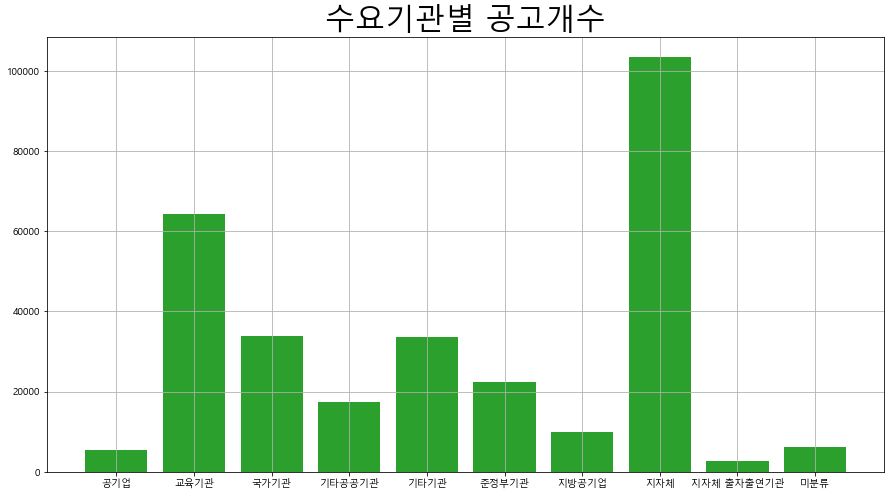

In [24]:
dataset_grouped_count = dataset.groupby(dataset.수요기관구분).공고일자.count().tolist()
dataset_grouped_null_count = dataset.groupby(dataset.수요기관구분.isnull()).공고일자.count().tolist()
dataset_grouped_count.append(dataset_grouped_null_count[1])

plt.bar(range(len(dataset_grouped_count)), dataset_grouped_count, color=['C2'])
dataset_grouped


plt.title("수요기관별 공고개수",fontsize=30)

dataset_grouped_name = ["공기업","교육기관","국가기관","기타공공기관","기타기관","준정부기관","지방공기업","지자체","지자체 출자출연기관","미분류"]


x_range = np.arange(10)
print(x_range)

plt.xticks(x_range,dataset_grouped_name)

plt.show()

# 지자체 detail

In [25]:
data_town = dataset[dataset['수요기관구분'] == '지자체']
data_town

,수요기관명,수요기관구분,수요기관지역명,최상위기관명,조달구분,업무구분,입찰방식,공고일자,개찰일자,공고건수,개찰완료건수,유찰건수,재입찰건수,낙찰자결정건수,낙찰금액합계,수요기관코드
17,충청북도 괴산군,지자체,충청북도 괴산군,충청북도,자체조달,기술용역,전자시담,20170123,20170123,4,4.0,0.0,0.0,4.0,52340000.0,4460000
27,강원도 춘천시,지자체,강원도 춘천시,강원도,자체조달,기술용역,전자입찰,20170426,20170502,2,2.0,0.0,0.0,2.0,123555770.0,4180000
28,서울특별시 서울시립대학교,지자체,서울특별시 동대문구,서울특별시,자체조달,기술용역,전자시담,20170413,20170413,1,1.0,0.0,0.0,1.0,13300000.0,6110158
29,서울특별시 서울시립대학교,지자체,서울특별시 동대문구,서울특별시,자체조달,물품,전자시담,20171019,20171019,1,1.0,0.0,0.0,1.0,6650000.0,6110158
30,제주특별자치도 제주시,지자체,제주특별자치도 제주시,제주특별자치도,자체조달,공사,전자입찰,20170919,20170925,1,1.0,0.0,0.0,1.0,77100299.0,6510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298907,경기도 김포시,지자체,경기도 김포시,경기도,자체조달,기술용역,전자입찰,20171113,20171122,1,1.0,0.0,0.0,1.0,NaN,4090000
298909,제주특별자치도,지자체,제주특별자치도 제주시,제주특별자치도,자체조달,기술용역,직찰,20170217,20170303,1,NaN,NaN,NaN,NaN,NaN,6500000
298915,제주특별자치도,지자체,제주특별자치도 제주시,제주특별자치도,자체조달,기술용역,전자입찰,20170210,20170217,1,1.0,0.0,0.0,1.0,NaN,6500000
298916,광양만권경제자유구역청,지자체,전라남도 광양시,전라남도,자체조달,기술용역,전자입찰,20170207,20170215,2,2.0,0.0,0.0,2.0,205483000.0,Z009240


In [26]:
col_name= ["수요기관명","최상위기관명","업무구분","공고건수","낙찰금액합계"]

data_town_detail = pd.DataFrame(data=data_town,columns=col_name)

In [27]:
data_town_detail

,수요기관명,최상위기관명,업무구분,공고건수,낙찰금액합계
17,충청북도 괴산군,충청북도,기술용역,4,52340000.0
27,강원도 춘천시,강원도,기술용역,2,123555770.0
28,서울특별시 서울시립대학교,서울특별시,기술용역,1,13300000.0
29,서울특별시 서울시립대학교,서울특별시,물품,1,6650000.0
30,제주특별자치도 제주시,제주특별자치도,공사,1,77100299.0
...,...,...,...,...,...
298907,경기도 김포시,경기도,기술용역,1,NaN
298909,제주특별자치도,제주특별자치도,기술용역,1,NaN
298915,제주특별자치도,제주특별자치도,기술용역,1,NaN
298916,광양만권경제자유구역청,전라남도,기술용역,2,205483000.0


In [28]:
temp_df = pd.DataFrame()

temp_df = data_town_detail.groupby(by=['수요기관명', '최상위기관명','업무구분'], as_index=False).sum()

temp_df

,수요기관명,최상위기관명,업무구분,공고건수,낙찰금액합계
0,(재)충청남도평생교육진흥원,충청남도,기술용역,1,4.650000e+07
1,(재)한국기후변화연구원,정부산하기관및위원회,기술용역,1,0.000000e+00
2,강원도,강원도,공사,137,5.789014e+10
3,강원도,강원도,기술용역,191,3.766991e+10
4,강원도,강원도,물품,238,3.561345e+10
...,...,...,...,...,...
4867,충청북도 충주시 환경수자원본부,충청북도,기술용역,6,3.169500e+05
4868,충청북도 충주시 환경수자원본부,충청북도,물품,18,3.581573e+09
4869,한성백제박물관,서울특별시,공사,8,8.949000e+07
4870,한성백제박물관,서울특별시,기술용역,32,7.292720e+08


In [29]:
data_town_detail.dtypes

수요기관명      object
최상위기관명     object
업무구분       object
공고건수        int64
낙찰금액합계    float64
dtype: object

In [30]:
data_town_detail['낙찰금액합계'] = data_town_detail['낙찰금액합계'].astype('float')

In [31]:
data_town_detail.dtypes

수요기관명      object
최상위기관명     object
업무구분       object
공고건수        int64
낙찰금액합계    float64
dtype: object

In [32]:
temp_df

,수요기관명,최상위기관명,업무구분,공고건수,낙찰금액합계
0,(재)충청남도평생교육진흥원,충청남도,기술용역,1,4.650000e+07
1,(재)한국기후변화연구원,정부산하기관및위원회,기술용역,1,0.000000e+00
2,강원도,강원도,공사,137,5.789014e+10
3,강원도,강원도,기술용역,191,3.766991e+10
4,강원도,강원도,물품,238,3.561345e+10
...,...,...,...,...,...
4867,충청북도 충주시 환경수자원본부,충청북도,기술용역,6,3.169500e+05
4868,충청북도 충주시 환경수자원본부,충청북도,물품,18,3.581573e+09
4869,한성백제박물관,서울특별시,공사,8,8.949000e+07
4870,한성백제박물관,서울특별시,기술용역,32,7.292720e+08


In [33]:
temp_df['낙찰금액합계'] = temp_df['낙찰금액합계'].astype('object')

In [34]:
temp_df

,수요기관명,최상위기관명,업무구분,공고건수,낙찰금액합계
0,(재)충청남도평생교육진흥원,충청남도,기술용역,1,46500000.0
1,(재)한국기후변화연구원,정부산하기관및위원회,기술용역,1,0.0
2,강원도,강원도,공사,137,57890137918.0
3,강원도,강원도,기술용역,191,37669910779.0
4,강원도,강원도,물품,238,35613453621.5
...,...,...,...,...,...
4867,충청북도 충주시 환경수자원본부,충청북도,기술용역,6,316950.0
4868,충청북도 충주시 환경수자원본부,충청북도,물품,18,3581572510.0
4869,한성백제박물관,서울특별시,공사,8,89490000.0
4870,한성백제박물관,서울특별시,기술용역,32,729272000.0


In [35]:
temp_df['수요기관명'].value_counts()


temp_df['낙찰금액합계'] = temp_df['낙찰금액합계'].astype('float')

temp_df

,수요기관명,최상위기관명,업무구분,공고건수,낙찰금액합계
0,(재)충청남도평생교육진흥원,충청남도,기술용역,1,4.650000e+07
1,(재)한국기후변화연구원,정부산하기관및위원회,기술용역,1,0.000000e+00
2,강원도,강원도,공사,137,5.789014e+10
3,강원도,강원도,기술용역,191,3.766991e+10
4,강원도,강원도,물품,238,3.561345e+10
...,...,...,...,...,...
4867,충청북도 충주시 환경수자원본부,충청북도,기술용역,6,3.169500e+05
4868,충청북도 충주시 환경수자원본부,충청북도,물품,18,3.581573e+09
4869,한성백제박물관,서울특별시,공사,8,8.949000e+07
4870,한성백제박물관,서울특별시,기술용역,32,7.292720e+08


In [36]:
temp_df.sort_values(by='낙찰금액합계',ascending=True)

,수요기관명,최상위기관명,업무구분,공고건수,낙찰금액합계
3943,전라북도 익산시 농업기술센터,전라북도,공사,2,0.000000e+00
946,경기도 이천시 보건소,경기도,기술용역,1,0.000000e+00
4230,충청남도 당진소방서,충청남도,기술용역,2,0.000000e+00
4237,충청남도 당진시 건설도시국 수도과,충청남도,물품,4,0.000000e+00
4238,충청남도 당진시 고대면,충청남도,공사,1,0.000000e+00
...,...,...,...,...,...
373,경기도 경기도건설본부,경기도,공사,198,2.577278e+11
2572,부산광역시,부산광역시,공사,40,2.991316e+11
1129,경상남도,경상남도,공사,74,3.035414e+11
2798,서울특별시,서울특별시,기술용역,2982,3.988490e+11


In [37]:
temp_df_top5=temp_df.tail()
temp_df_top5

,수요기관명,최상위기관명,업무구분,공고건수,낙찰금액합계
4867,충청북도 충주시 환경수자원본부,충청북도,기술용역,6,3.169500e+05
4868,충청북도 충주시 환경수자원본부,충청북도,물품,18,3.581573e+09
4869,한성백제박물관,서울특별시,공사,8,8.949000e+07
4870,한성백제박물관,서울특별시,기술용역,32,7.292720e+08
4871,한성백제박물관,서울특별시,물품,26,4.032476e+08


In [38]:
con=data_town.수요기관명=='한성백제박물관'
data_town[con]

,수요기관명,수요기관구분,수요기관지역명,최상위기관명,조달구분,업무구분,입찰방식,공고일자,개찰일자,공고건수,개찰완료건수,유찰건수,재입찰건수,낙찰자결정건수,낙찰금액합계,수요기관코드
3808,한성백제박물관,지자체,서울특별시 송파구,서울특별시,자체조달,기술용역,전자시담,20170427,20170427,1,1.0,0.0,0.0,1.0,7800000.0,Z023864
5186,한성백제박물관,지자체,서울특별시 송파구,서울특별시,자체조달,기술용역,전자시담,20171222,20171222,1,1.0,0.0,0.0,1.0,48000000.0,Z023864
6762,한성백제박물관,지자체,서울특별시 송파구,서울특별시,자체조달,물품,전자시담,20171116,20171116,1,1.0,0.0,0.0,1.0,14200000.0,Z023864
9721,한성백제박물관,지자체,서울특별시 송파구,서울특별시,자체조달,공사,전자시담,20170414,20170414,1,1.0,0.0,0.0,1.0,6200000.0,Z023864
14046,한성백제박물관,지자체,서울특별시 송파구,서울특별시,자체조달,물품,전자시담,20170717,20170717,1,1.0,0.0,0.0,1.0,NaN,Z023864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282113,한성백제박물관,지자체,서울특별시 송파구,서울특별시,자체조달,물품,전자시담,20170628,20170628,1,1.0,0.0,0.0,1.0,4200000.0,Z023864
284748,한성백제박물관,지자체,서울특별시 송파구,서울특별시,자체조달,물품,전자시담,20171208,20171208,1,1.0,0.0,0.0,1.0,32500000.0,Z023864
287009,한성백제박물관,지자체,서울특별시 송파구,서울특별시,자체조달,기술용역,전자입찰,20171213,20171220,1,0.0,1.0,0.0,1.0,NaN,Z023864
294052,한성백제박물관,지자체,서울특별시 송파구,서울특별시,자체조달,물품,전자시담,20171026,20171026,1,1.0,0.0,0.0,1.0,15500000.0,Z023864


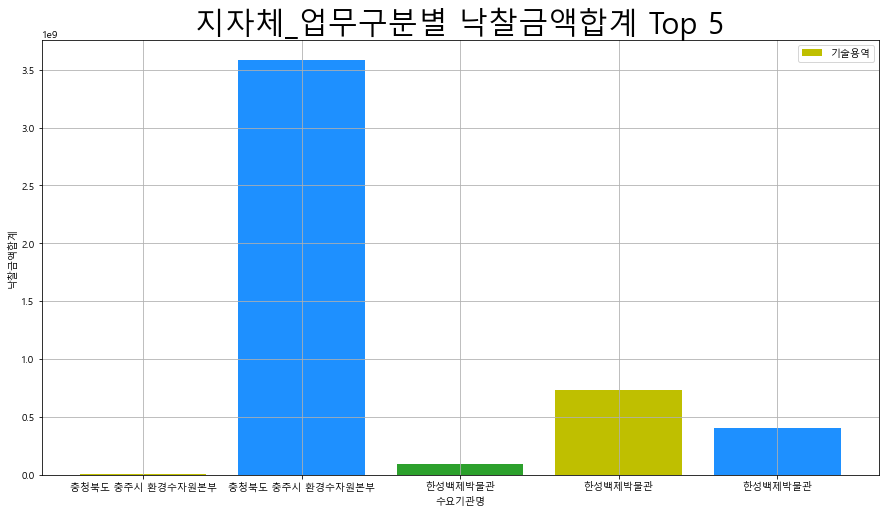

In [39]:

work_section = temp_df_top5.수요기관명.values.tolist()
success_price = temp_df_top5.낙찰금액합계.values.tolist()

work_section
success_price
x_r = np.arange(5)
colors = ['y', 'dodgerblue', 'C2','y','dodgerblue']
plt.bar(range(len(success_price)),success_price,color=colors)



plt.xticks(x_r,work_section)

plt.title("지자체_업무구분별 낙찰금액합계 Top 5",fontsize=30)
plt.xlabel("수요기관명")
plt.ylabel("낙찰금액합계")
label = ["기술용역","물품","공사"]
plt.legend(label)
plt.show()


In [49]:
corr=data_town.corr()
corr

,공고일자,개찰일자,공고건수,개찰완료건수,유찰건수,재입찰건수,낙찰자결정건수,낙찰금액합계
공고일자,1.000000,0.494803,-0.032454,-0.032088,-0.003997,0.004635,-0.033701,0.014797
개찰일자,0.494803,1.000000,-0.029025,-0.034319,0.026388,-0.006405,-0.028580,0.039991
공고건수,-0.032454,-0.029025,1.000000,0.970422,0.027034,0.193182,0.999736,0.060968
개찰완료건수,-0.032088,-0.034319,0.970422,1.000000,-0.208637,0.187561,0.970682,0.061944
유찰건수,-0.003997,0.026388,0.027034,-0.208637,1.000000,0.013657,0.027125,-0.000938
재입찰건수,0.004635,-0.006405,0.193182,0.187561,0.013657,1.000000,0.195405,0.002457
낙찰자결정건수,-0.033701,-0.028580,0.999736,0.970682,0.027125,0.195405,1.000000,0.060928
낙찰금액합계,0.014797,0.039991,0.060968,0.061944,-0.000938,0.002457,0.060928,1.000000


In [44]:
import seaborn as sns

C:\Users\yjhon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yjhon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


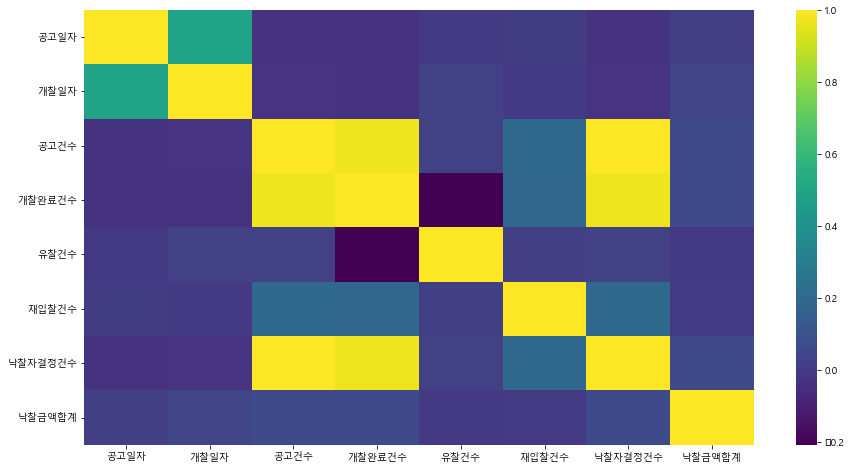

In [45]:
sns.heatmap(corr, cmap='viridis')
plt.show()

array([[1.        , 0.99999994],
       [0.99999994, 1.        ]])

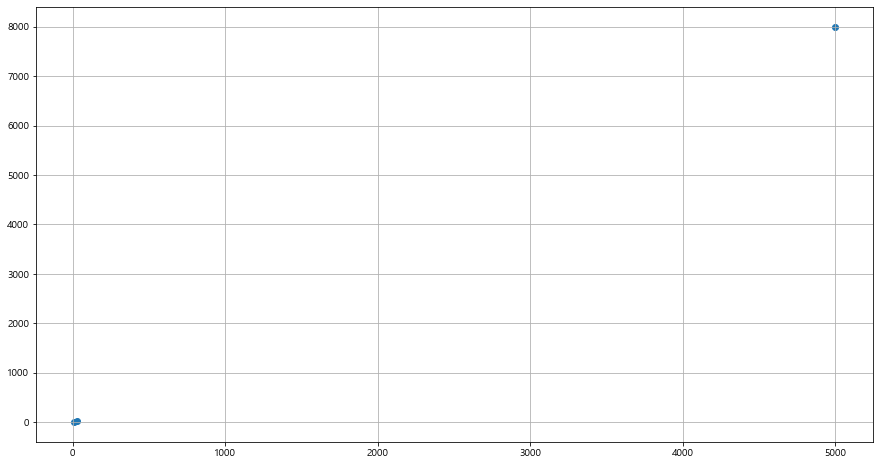

In [48]:
from scipy import stats

pulse = np.array([10,5000,30])
height = np.array([1,8000,30])
plt.scatter(pulse, height)

# output : corr, p_value
stats.pearsonr(pulse, height)

# df.corr() : 데이터프레임으로 입력한 경우
np.corrcoef(pulse, height) #array로 입력한 경우
